#### Importing libraries

In [1]:
import pandas as pd
import os
import calendar

#### Merging 12 month of data in one file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv('all_data.csv',index=False)

#### Read the all_data file

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
type('Month')

str

#### Cleaning  Data 

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how = 'all')

nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data =all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### chaning numbers into names 

In [8]:
all_data['mname'] = all_data['Month'].apply(lambda x: calendar.month_name[x])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,September
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,September
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,September
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,September


In [9]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('float')
all_data['Price Each']=all_data['Price Each'].astype('float')


#### Add a sales total coulmn

In [10]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [11]:
#all_data.insert(loc = 5,column ='sales',value = values)
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,April,11.95
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,April,99.99
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,April,11.95
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,April,1700.00
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,April,11.99


#### 1-the highest month in sales 

In [12]:
monthly_sales=all_data.groupby('Month').sum(numeric_only=True)
monthly_sales

,Quantity Ordered,Price Each,sales
Month,,,
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
8,13448.0,2230345.42,2244467.88
9,13109.0,2084992.09,2097560.13


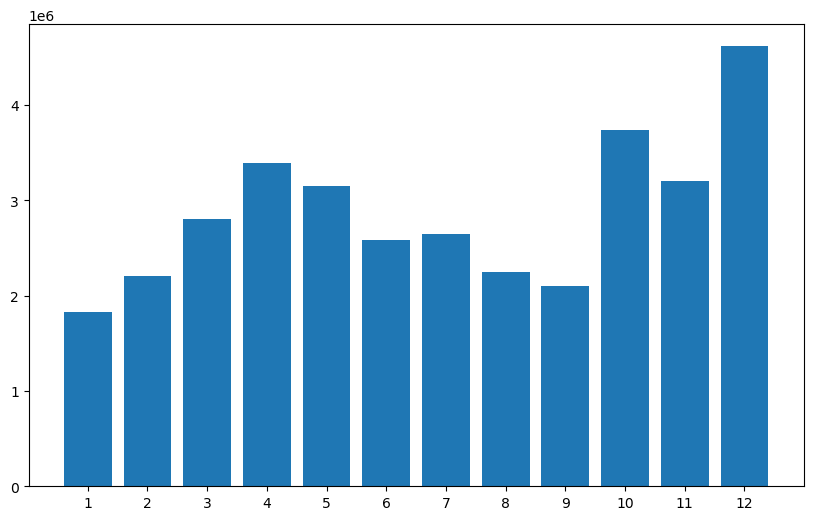

In [13]:
import matplotlib.pyplot as plt
month = range(1,13)
plt.figure(figsize=(10,6))
plt.bar(month,monthly_sales['sales'])
plt.xticks(month)
plt.show()

#### 2- The highest City in sales

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99


In [15]:
all_data['city']=all_data['Purchase Address'].apply(lambda x:f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA)


In [16]:
x=all_data['city'].unique()
x

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

In [17]:
from collections import Counter
y=Counter(all_data['city'])
y

Counter({' Dallas (TX)': 14820,
         ' Boston (MA)': 19934,
         ' Los Angeles (CA)': 29605,
         ' San Francisco (CA)': 44732,
         ' Seattle (WA)': 14732,
         ' Atlanta (GA)': 14881,
         ' New York City (NY)': 24876,
         ' Portland (OR)': 10010,
         ' Austin (TX)': 9905,
         ' Portland (ME)': 2455})

#### city orders numbers


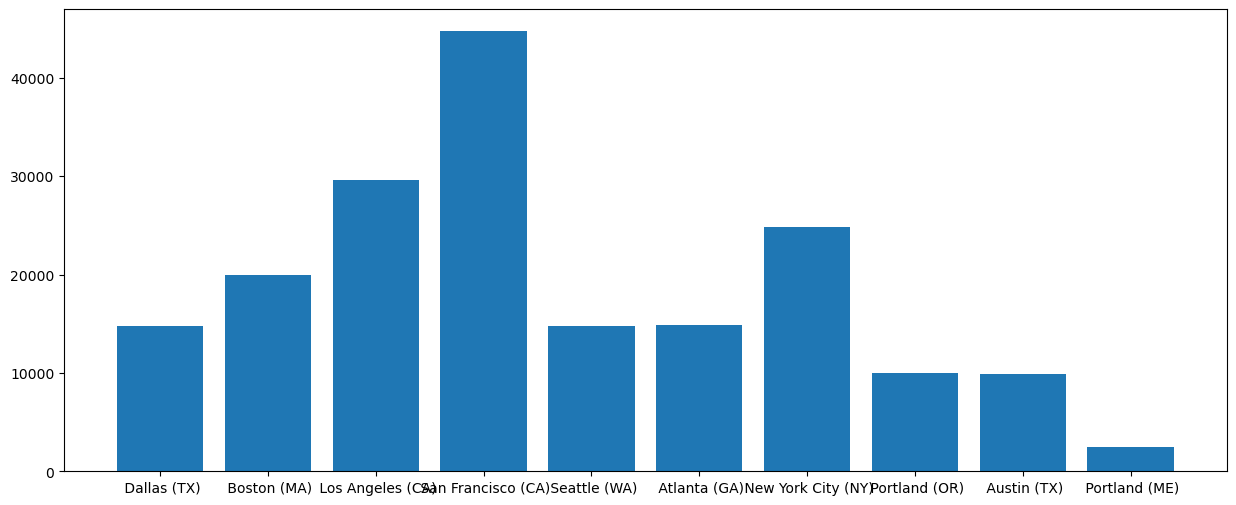

In [18]:
names = list(y.keys())
values = list(y.values())
plt.figure(figsize=(15,6))
plt.bar(range(len(y)), values, tick_label=names)
plt.show()

In [19]:
cities_sales=all_data.groupby('city').sum()
cities_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales
city,,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602.0,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153.0,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528.0,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,3661642.01
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730.0,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289.0,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,5452570.80
New York City (NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932.0,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,4664317.43
Portland (ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750.0,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,449758.27
Portland (OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303.0,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,1870732.34
San Francisco (CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239.0,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,AprilAprilAprilAprilAprilAprilAprilAprilAprilA...,8262203.91


#### city sales

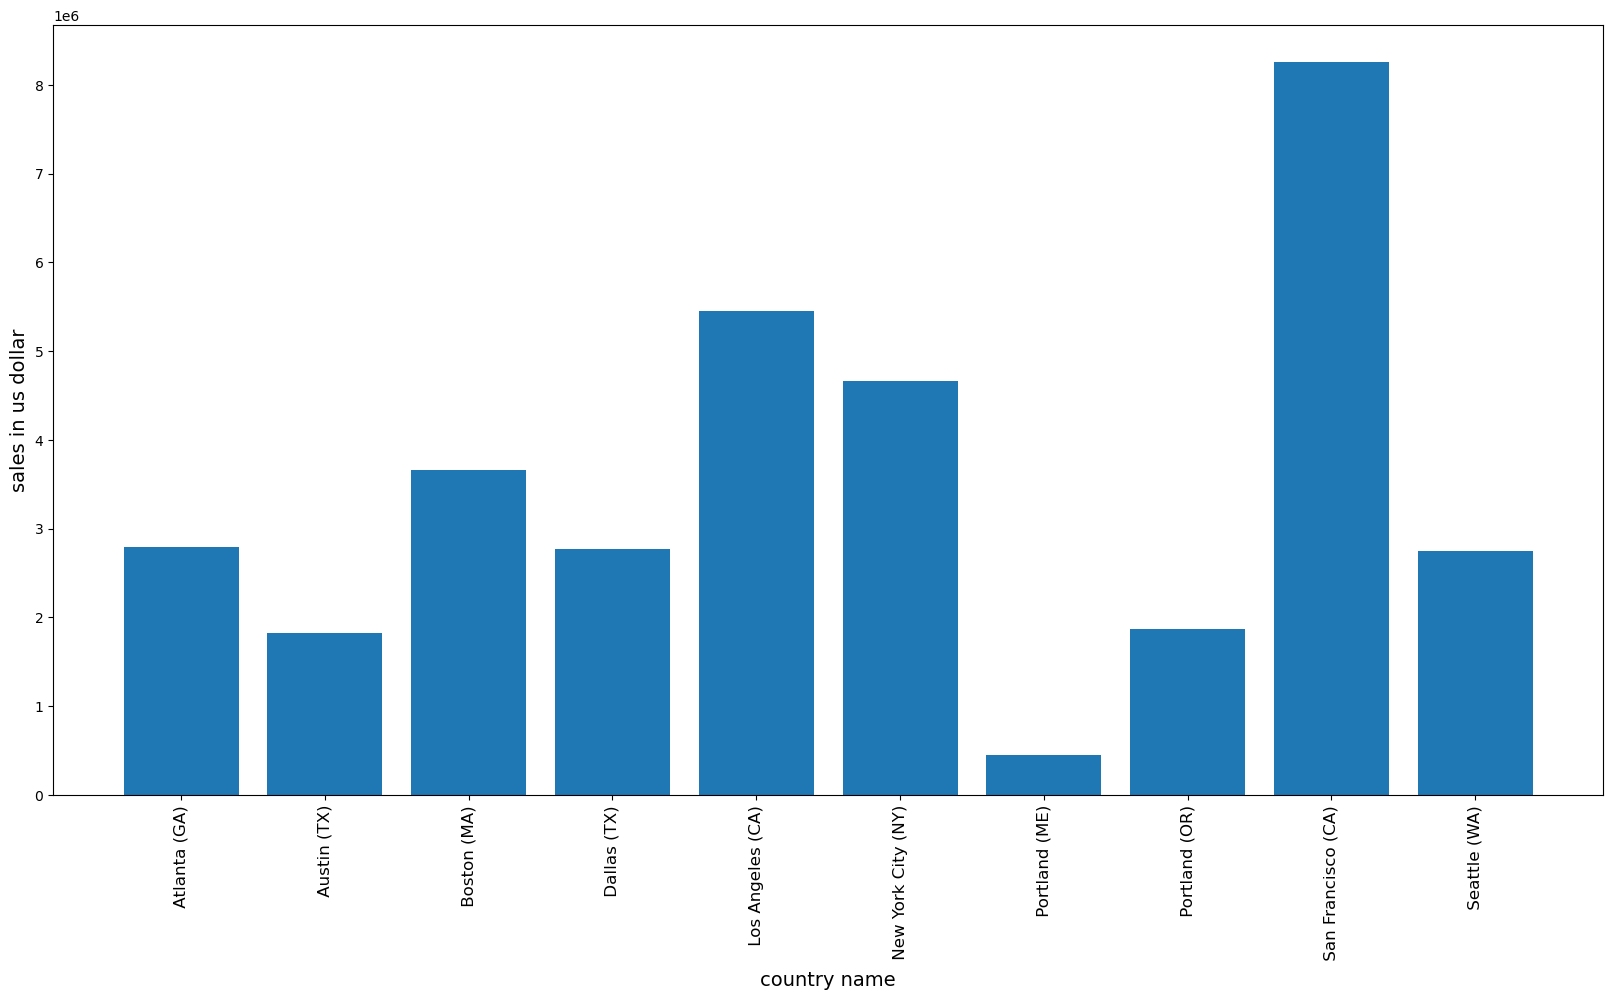

In [20]:
cities=[]
for city in cities_sales.groupby('city'):
 cities.append(city[0])

plt.figure(figsize=(20,10))
plt.bar(cities,cities_sales['sales'])
plt.xticks(cities, rotation='vertical',size=12)
plt.ylabel('sales in us dollar',size=14)
plt.xlabel('country name',size=14)
plt.show()

#### 3-best timing for adveretising to maximize the buying likelihood

In [21]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,September,8.97,Los Angeles (CA)
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,September,700.00,San Francisco (CA)
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,September,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,September,379.99,San Francisco (CA)


In [22]:
all_data['date']=all_data['Order Date'].str[0:8]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),04/19/19
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),04/07/19
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),04/12/19
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),04/12/19
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),04/30/19


In [23]:
#all_data[all_data['date'].isin('/')]
dd=all_data.loc[all_data['Month']>(12)]
dd

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date


In [24]:
import datetime
all_data['date']=all_data['date'].astype(str)
all_data['mmonth'] = all_data['date'].str.split('/').str[0].astype(int)
all_data['day'] = all_data['date'].str.split('/').str[1].astype(int)
all_data['Year'] = all_data['date'].str.split('/').str[2].astype(int)
# Create a datetime.date object using the extracted year, month, and day
all_data['date'] = all_data.apply(lambda row: datetime.date(row['Year'], row['mmonth'], row['day']), axis=1)

# Extract the weekday and store it in a new column 'weekday'
all_data['weekday'] = all_data['date'].apply(lambda x: x.strftime("%A"))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date,mmonth,day,Year,weekday
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),0019-04-19,4,19,19,Friday
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),0019-04-07,4,7,19,Sunday
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),0019-04-12,4,12,19,Friday
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-12,4,12,19,Friday
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-30,4,30,19,Tuesday


In [25]:
type('weekday')

str

In [26]:
r = all_data['sales'].groupby(all_data['weekday']).sum()
day_names = [ 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sorted_series = r.reindex(day_names)
sorted_series

weekday
Saturday     4904357.01
Sunday       4932169.66
Monday       4883326.72
Tuesday      5087956.78
Wednesday    4988822.26
Thursday     4839465.16
Friday       4855938.38
Name: sales, dtype: float64

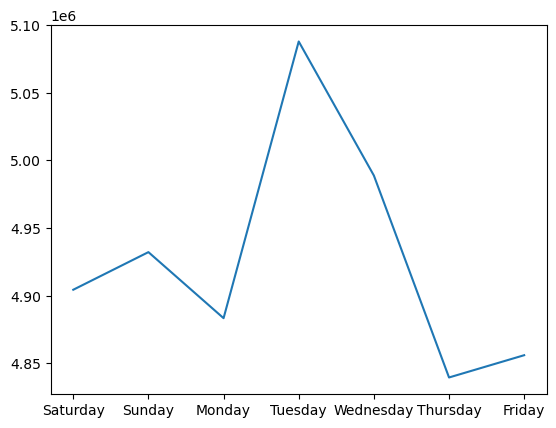

In [27]:
p = plt.plot(sorted_series.index,sorted_series.values)


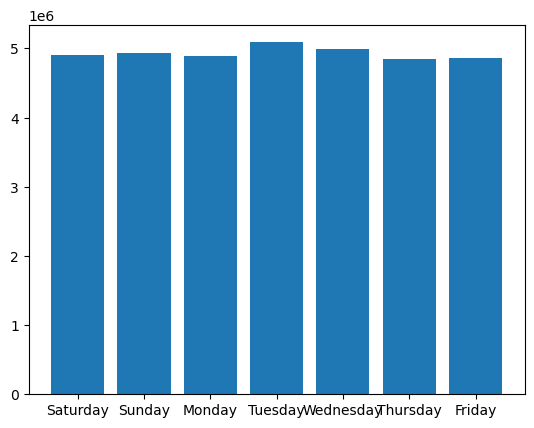

In [28]:
p = plt.bar(sorted_series.index,sorted_series.values)


In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date,mmonth,day,Year,weekday
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),0019-04-19,4,19,19,Friday
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),0019-04-07,4,7,19,Sunday
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),0019-04-12,4,12,19,Friday
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-12,4,12,19,Friday
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-30,4,30,19,Tuesday


In [30]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14132\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date,mmonth,day,Year,weekday
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),0019-04-19,4,19,19,Friday
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),0019-04-07,4,7,19,Sunday
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),0019-04-12,4,12,19,Friday
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-12,4,12,19,Friday
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-30,4,30,19,Tuesday


In [32]:
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']= all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date,mmonth,day,Year,weekday,hour,minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),0019-04-19,4,19,19,Friday,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),0019-04-07,4,7,19,Sunday,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),0019-04-12,4,12,19,Friday,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-12,4,12,19,Friday,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-30,4,30,19,Tuesday,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,September,8.97,Los Angeles (CA),0019-09-17,9,17,19,Tuesday,20,56
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,September,700.00,San Francisco (CA),0019-09-01,9,1,19,Sunday,16,0
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,September,700.00,San Francisco (CA),0019-09-23,9,23,19,Monday,7,39
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,September,379.99,San Francisco (CA),0019-09-19,9,19,19,Thursday,17,30


([<matplotlib.axis.XTick at 0x1d319309420>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

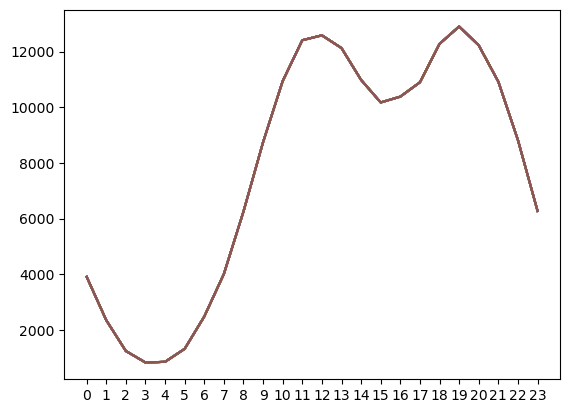

In [33]:
hours=[hour for hour, df in all_data.groupby('hour')]
plt.plot(hours,all_data.groupby(['hour']).count())
plt.xticks(hours)

#### 4-most product sold together

In [34]:
all_data.tail(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date,mmonth,day,Year,weekday,hour,minute
186799,259310,Apple Airpods Headphones,1.0,150.00,2019-09-15 19:08:00,"309 Elm St, Los Angeles, CA 90001",9,September,150.00,Los Angeles (CA),0019-09-15,9,15,19,Sunday,19,8
186800,259311,Flatscreen TV,1.0,300.00,2019-09-18 14:54:00,"930 North St, Seattle, WA 98101",9,September,300.00,Seattle (WA),0019-09-18,9,18,19,Wednesday,14,54
186801,259312,Wired Headphones,1.0,11.99,2019-09-02 19:51:00,"573 Sunset St, San Francisco, CA 94016",9,September,11.99,San Francisco (CA),0019-09-02,9,2,19,Monday,19,51
186802,259313,Bose SoundSport Headphones,1.0,99.99,2019-09-05 11:34:00,"138 2nd St, Los Angeles, CA 90001",9,September,99.99,Los Angeles (CA),0019-09-05,9,5,19,Thursday,11,34
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,11.99,Atlanta (GA),0019-09-16,9,16,19,Monday,0,25
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,September,5.98,Atlanta (GA),0019-09-16,9,16,19,Monday,0,25
186805,259315,Lightning Charging Cable,1.0,14.95,2019-09-29 16:20:00,"112 5th St, Boston, MA 02215",9,September,14.95,Boston (MA),0019-09-29,9,29,19,Sunday,16,20
186806,259316,AAA Batteries (4-pack),1.0,2.99,2019-09-16 16:48:00,"369 Johnson St, Atlanta, GA 30301",9,September,2.99,Atlanta (GA),0019-09-16,9,16,19,Monday,16,48
186807,259317,Lightning Charging Cable,1.0,14.95,2019-09-26 21:12:00,"151 1st St, New York City, NY 10001",9,September,14.95,New York City (NY),0019-09-26,9,26,19,Thursday,21,12
186808,259318,AAA Batteries (4-pack),1.0,2.99,2019-09-30 10:05:00,"524 Hickory St, Boston, MA 02215",9,September,2.99,Boston (MA),0019-09-30,9,30,19,Monday,10,5


In [35]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','grouped']].drop_duplicates()
df.head(50)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14132\2668519918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [36]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

#### 5- most selling product

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,mname,sales,city,date,mmonth,day,Year,weekday,hour,minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas (TX),0019-04-19,4,19,19,Friday,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston (MA),0019-04-07,4,7,19,Sunday,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles (CA),0019-04-12,4,12,19,Friday,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-12,4,12,19,Friday,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles (CA),0019-04-30,4,30,19,Tuesday,9,27


In [38]:
all_data['Quantity Ordered'].astype(int)

0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int32

In [39]:
product_grouped=all_data.groupby('Product')
qun_grouped=product_grouped.sum(numeric_only=True)
qun_grouped

,Quantity Ordered,Price Each,Month,sales,mmonth,day,Year,hour,minute
Product,,,,,,,,,
20in Monitor,4129.0,451068.99,29336,454148.71,29336,64237,77921,58764,122252
27in 4K Gaming Monitor,6244.0,2429637.70,44440,2435097.56,44440,97624,118371,90916,184331
27in FHD Monitor,7550.0,1125974.93,52558,1132424.50,52558,117702,142636,107540,219948
34in Ultrawide Monitor,6199.0,2348718.19,43304,2355558.01,43304,97726,117439,89076,183480
AA Batteries (4-pack),27635.0,79015.68,145558,106118.40,145558,325504,390963,298342,609039
AAA Batteries (4-pack),31017.0,61716.59,146370,92740.83,146370,326283,392182,297332,612113
Apple Airpods Headphones,15661.0,2332350.00,109477,2349150.00,109477,244828,295435,223304,455570
Bose SoundSport Headphones,13457.0,1332366.75,94113,1345565.43,94113,210543,253178,192445,392603
Flatscreen TV,4819.0,1440000.00,34224,1445700.00,34224,75959,91201,68815,142789


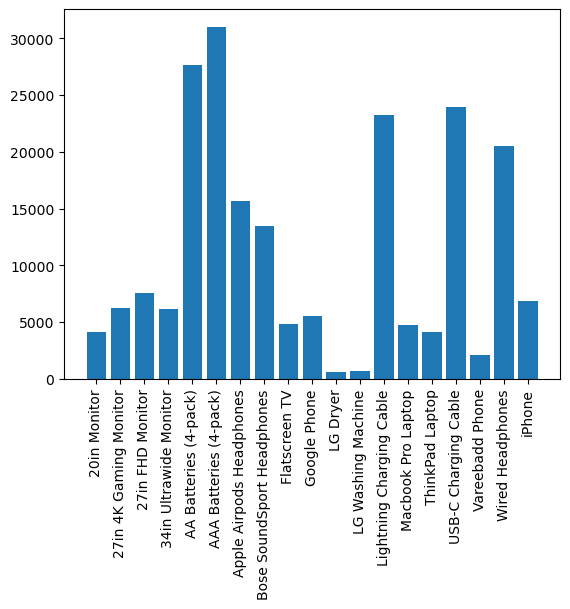

In [40]:
product_lis=[product for product , df in product_grouped]
plt.bar(product_lis,qun_grouped['Quantity Ordered'])
plt.xticks(product_lis,rotation='vertical',size=10)
plt.show()

In [41]:
prices=product_grouped.mean(numeric_only=True)['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14132\2600180617.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_lis,rotation='vertical',size=10)


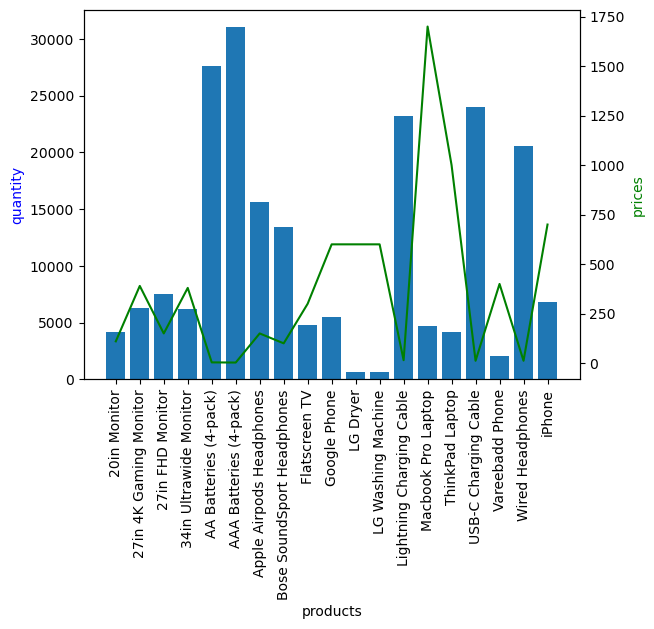

In [42]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product_lis,qun_grouped['Quantity Ordered'])
ax2.plot(product_lis,prices,color='g')
ax1.set_xlabel('products')
ax1.set_ylabel('quantity',color='b')
ax2.set_ylabel('prices',color='g')
ax1.set_xticklabels(product_lis,rotation='vertical',size=10)
plt.show()

In [44]:
all_data.to_csv('new_data.csv',index=False)